# House Price Analysis: King County

This notebook analyzes and predicts housing prices in King County using various features. Each section answers a specific assignment question.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

In [3]:
# Load dataset
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 1. Display the data types of each column

In [4]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 2. Drop columns 'id' and 'Unnamed: 0', then show statistical summary

In [5]:
# Check for 'Unnamed: 0' column first
columns_to_drop = ['id']
if 'Unnamed: 0' in df.columns:
    columns_to_drop.append('Unnamed: 0')

df.drop(columns_to_drop, axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 3. Count the number of houses with unique floor values

In [6]:
df['floors'].value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


## 4. Boxplot: Waterfront vs Price Outliers

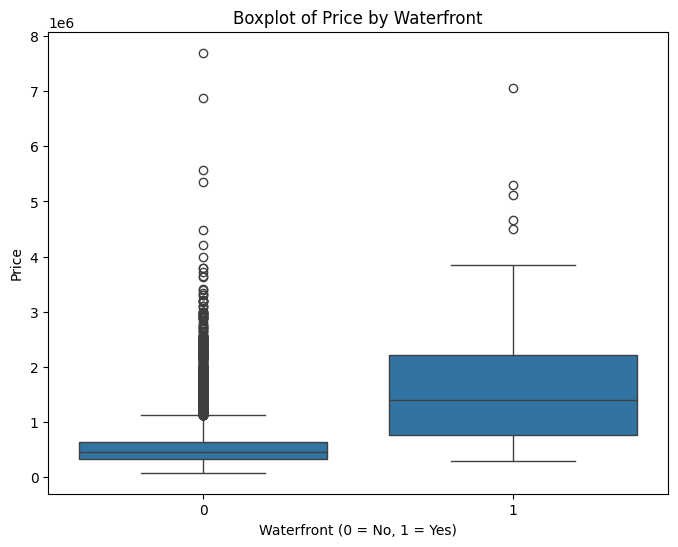

In [7]:
plt.figure(figsize=(8,6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Boxplot of Price by Waterfront')
plt.xlabel('Waterfront (0 = No, 1 = Yes)')
plt.ylabel('Price')
plt.show()

## 5. Regplot: sqft_above vs Price

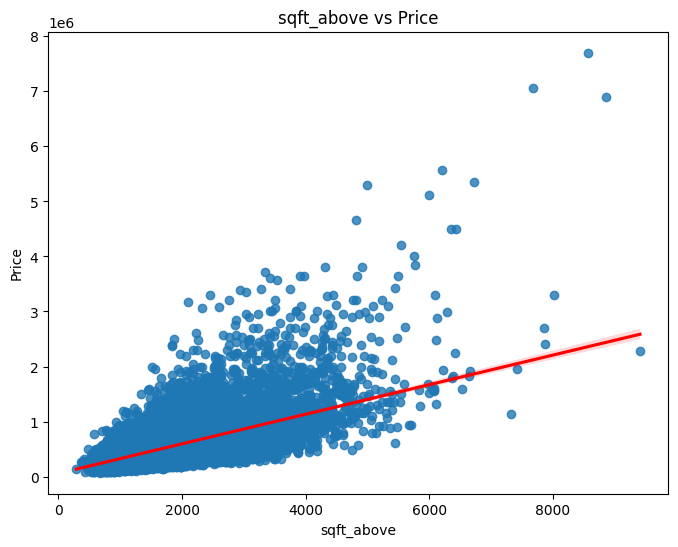

In [8]:
plt.figure(figsize=(8,6))
sns.regplot(x='sqft_above', y='price', data=df, line_kws={'color':'red'})
plt.title('sqft_above vs Price')
plt.xlabel('sqft_above')
plt.ylabel('Price')
plt.show()

## 6. Linear Regression: Predict price using 'sqft_living'

In [9]:
X = df[['sqft_living']]
y = df['price']
lm = LinearRegression()
lm.fit(X, y)
r2 = lm.score(X, y)
print(f'R^2: {r2:.4f}')

R^2: 0.4929


## 7. Linear Regression: Predict price using multiple features

In [10]:
features = [
    'floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement',
    'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living'
]
X_multi = df[features]
lm_multi = LinearRegression()
lm_multi.fit(X_multi, y)
r2_multi = lm_multi.score(X_multi, y)
print(f'R^2 (multiple features): {r2_multi:.4f}')

R^2 (multiple features): 0.6577


## 8. Pipeline: Scaling, Polynomial Transform, Linear Regression

In [11]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('lm', LinearRegression())
])
pipe.fit(X_multi, y)
r2_pipe = pipe.score(X_multi, y)
print(f'R^2 (pipeline): {r2_pipe:.4f}')

R^2 (pipeline): 0.7513


## 9. Ridge Regression (alpha=0.1) on train/test split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=1)
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
r2_ridge = ridge.score(X_test, y_test)
print(f'R^2 (Ridge, test data): {r2_ridge:.4f}')

R^2 (Ridge, test data): 0.6460


## 10. Polynomial (degree 2) + Ridge Regression (alpha=0.1) on train/test split

In [13]:
poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)
ridge_poly2 = Ridge(alpha=0.1)
ridge_poly2.fit(X_train_poly2, y_train)
r2_ridge_poly2 = ridge_poly2.score(X_test_poly2, y_test)
print(f'R^2 (Poly2 + Ridge, test data): {r2_ridge_poly2:.4f}')

R^2 (Poly2 + Ridge, test data): 0.7546
